In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime
import os
from glob import glob
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]

In [75]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    # print(column_name)
    x = np.arange(0, len(data_frame), step=1)
    # y = np.arange(0, len(data_frame)/100, step=1/100)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    plt.imshow(data_frame)
    plt.rcParams['figure.figsize'] = [6, 6]
    #ax.set_title(t)
    #plt.tight_layout()

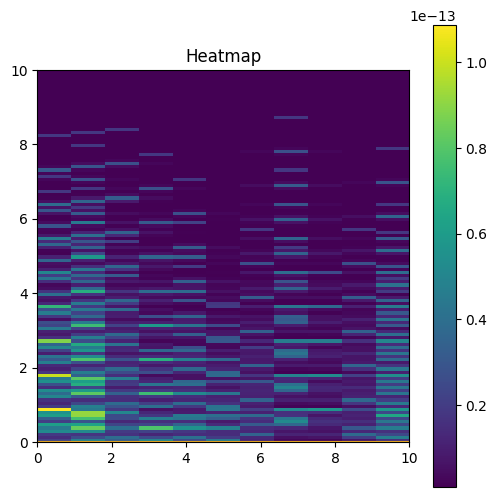

In [76]:
twod_piezo = pd.DataFrame(pd.read_csv("../data_files/2d_Piezo_Channel.csv"))
#display(static_ap_df)
graph_df(twod_piezo,0,2)
heatmap = plt.imshow(twod_piezo, extent =[0, 10, 0, 10])
plt.colorbar(heatmap)
plt.title('Heatmap')
plt.show()

# Video gen

In [77]:
def graph_time_frame(data_frame,k,counter):
    row1 = data_frame.iloc[k:k+10,:]
    x = np.arange(0,len(row1),step = 1)
    fig, ax = plt.subplots()
    ax.plot(x,row1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    heatmap = plt.imshow(row1,vmin = 8e-16,vmax = 500e-16)
    plt.colorbar(heatmap)
    plt.title('Heatmap')
    ax.set_title(f"time: {counter}")
    plt.savefig(f"../graphs/2D/{counter}")
    plt.close() 

In [78]:
os.makedirs("../graphs/2D", exist_ok=True)

old_files = glob("../graphs/2D/*.png")
for f in old_files:
    os.remove(f)

In [79]:
j = 11
k = 0
counter = 0
while k < len(twod_piezo):
    graph_time_frame(twod_piezo,k,counter)
    k += 11
    j += 11
    counter += 1

In [80]:
# for i in range(len(twod_piezo)): 
#     graph_time_frame(twod_piezo,i)

In [81]:
# how to make this do videos :) 
# help angela 

now = datetime.now()
current_time = now.strftime("%H_%M")
print(current_time)
os.system("convert -delay 1 -loop 0 $(ls -1 ../graphs/2D/*.png | sort -V) -quality 95 ../vid/{}_{}.mp4".format("propagation",current_time))

11_49


0